<a href="https://colab.research.google.com/github/mcomegalletas/AIClassProjects/blob/main/Convolutional%20Network%20-%20Bottles%20and%20Cans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import cv2
import imghdr
data_dir = '/content/drive/MyDrive/BotellasYLatas'
image_exts = ['jpeg','jpg', 'bmp', 'png']


for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

## Upload Data //Cargar datos

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K

data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 378 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

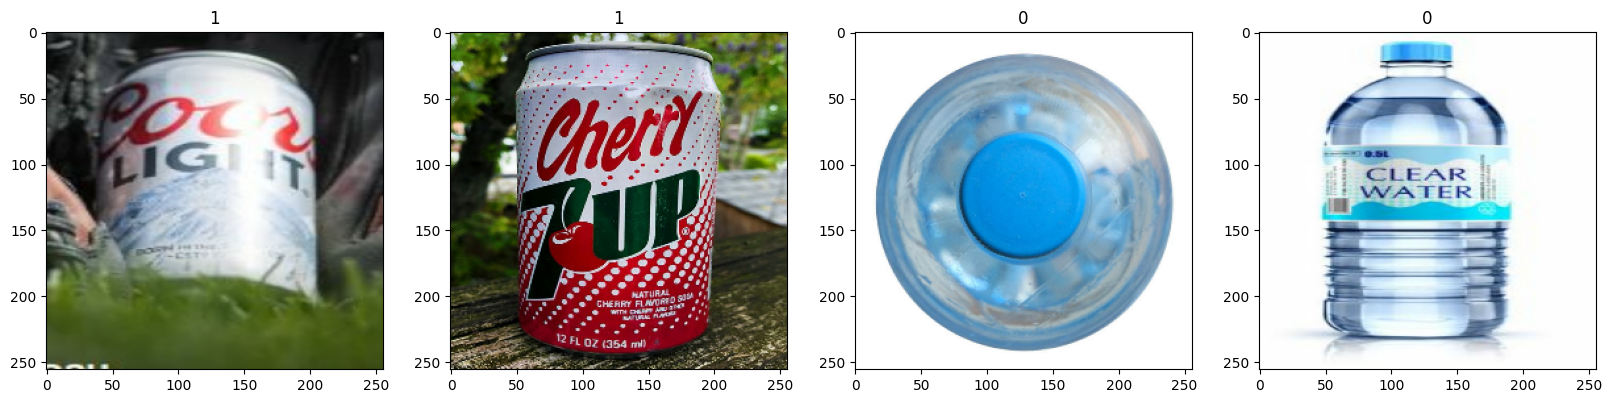

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scale Data // Escalar datos


In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.75686276, 0.7137255 , 0.63529414],
          [0.7570389 , 0.71390164, 0.63511795],
          [0.75846356, 0.7153263 , 0.63369334],
          ...,
          [0.6056832 , 0.4477788 , 0.34829962],
          [0.5971354 , 0.45062807, 0.34545037],
          [0.59607846, 0.4509804 , 0.34509805]],
 
         [[0.74273896, 0.6890089 , 0.5893918 ],
          [0.74291515, 0.689185  , 0.589533  ],
          [0.74433976, 0.6906097 , 0.5906737 ],
          ...,
          [0.6063315 , 0.44359958, 0.34332737],
          [0.60034907, 0.44388342, 0.34176078],
          [0.5996094 , 0.4439185 , 0.3415671 ]],
 
         [[0.7313649 , 0.6470282 , 0.52544427],
          [0.7313942 , 0.6470575 , 0.5251796 ],
          [0.7316306 , 0.6472939 , 0.52303994],
          ...,
          [0.60373306, 0.4365962 , 0.3381717 ],
          [0.6004109 , 0.4365962 , 0.3379352 ],
          [0.6       , 0.4365962 , 0.33790594]],
 
         ...,
 
         [[0.99607843, 0.99607843, 0.9882353 ],
          [0.99607

##Split data // Dividir datos


In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
print(train_size, val_size,test_size)


8 2 1


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Build model // Construir Modelo

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import History
from keras.optimizers import Adam
from keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation='relu' ))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
lr = 0.001  # Tasa de aprendizaje deseada
optimizer = Adam(learning_rate=lr)

model.compile(optimizer=optimizer, loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Train // Entrenamiento


In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# Definir el callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.05)

# Entrenar el modelo con EarlyStopping
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback, early_stopping])

Epoch 1/50
8/8 [==============================] - 19s 2s/step - loss: 0.7560 - accuracy: 0.5430 - val_loss: 0.6483 - val_accuracy: 0.7188
Epoch 2/50
8/8 [==============================] - 15s 2s/step - loss: 0.6349 - accuracy: 0.6875 - val_loss: 0.5959 - val_accuracy: 0.6562
Epoch 3/50
8/8 [==============================] - 16s 2s/step - loss: 0.5887 - accuracy: 0.6914 - val_loss: 0.5468 - val_accuracy: 0.6875
Epoch 4/50
8/8 [==============================] - 15s 2s/step - loss: 0.5547 - accuracy: 0.7148 - val_loss: 0.4854 - val_accuracy: 0.7812
Epoch 5/50
8/8 [==============================] - 15s 2s/step - loss: 0.4956 - accuracy: 0.7734 - val_loss: 0.4597 - val_accuracy: 0.7656
Epoch 6/50
8/8 [==============================] - 17s 2s/step - loss: 0.4024 - accuracy: 0.8359 - val_loss: 0.4367 - val_accuracy: 0.7500
Epoch 7/50
8/8 [==============================] - 15s 2s/step - loss: 0.3848 - accuracy: 0.8125 - val_loss: 0.3277 - val_accuracy: 0.8906
Epoch 8/50
8/8 [==================

In [ ]:
history_dict = hist.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Plot performance // Gráfica de desempeño

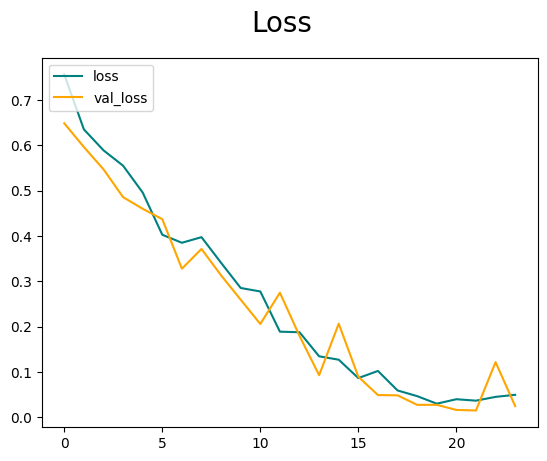

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

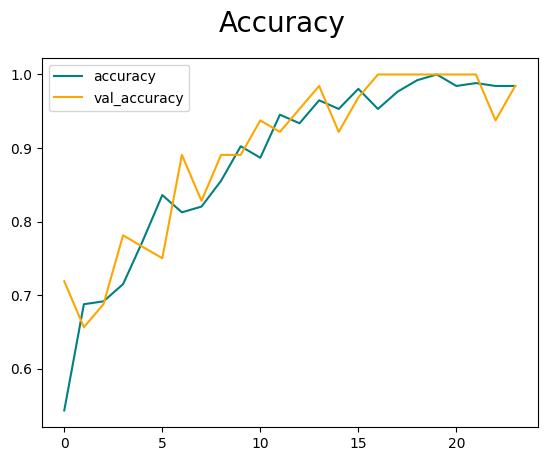

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate // Evaluar


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 492ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


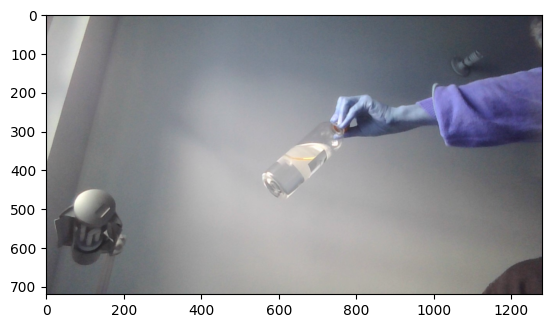

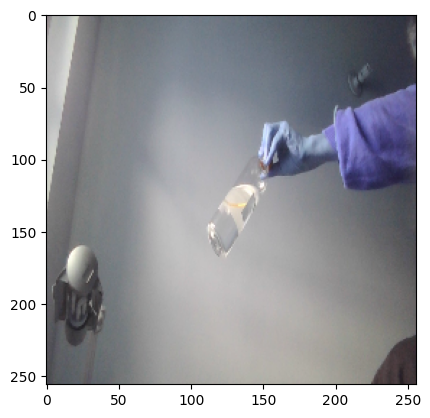

1/1 [==============================] - 0s 30ms/step
[[0.03796373]]
Predicted class is Botella


In [ ]:
import cv2
img = cv2.imread('/content/WIN_20230528_14_40_44_Pro.jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)
if yhat > 0.5:
    print(f'Predicted class is Lata ')
else:
    print(f'Predicted class is Botella')

In [ ]:
model.save("my_model.h5", include_optimizer=True)

In [ ]:
from keras.models import load_model
model = load_model('my_model.h5')